### 1_World_Enviorenment

### Inport

In [1]:
import pandas as pd
import numpy as np
import pandasdmx as pdmx

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew

from sklearn.preprocessing import MinMaxScaler
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#plt.style.use('classic')
sns.set_style("white")

c:\Users\engin\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


### Data Scraping Oecd

In [2]:
# SDMX DATA URL: https://stats.oecd.org/restsdmx/sdmx.ashx/GetData/AEI_OTHER/AUS+AUT+BEL+CAN+CHL+COL+CRI+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ISL+IRL+ISR+ITA+JPN+KOR+LVA+LTU+LUX+MEX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA+BRA+BGR+CHN+HRV+CYP+IND+IDN+KAZ+MLT+PHL+ROU+RUS+ZAF+UKR+VNM.TOTPEST+TOTFRESHWATER+TOTAGR_LAND+TOTENERGYAG+CO2AGR+CH4AGR+N2OAGR+WATERSOILEROSION+WINDSOILEROSION+RUNOFF-WATER+DRINK-WATER/all?startTime=1985&endTime=2019

In [3]:
import pandasdmx as pdmx

oecd = pdmx.Request("OECD")

data_resource_id="AEI_OTHER"
data_key="AUS+AUT+BEL+CAN+CHL+COL+CRI+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ISL+IRL+ISR+ITA+JPN+KOR+LVA+LTU+LUX+MEX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA+BRA+BGR+CHN+HRV+CYP+IND+IDN+KAZ+MLT+PHL+ROU+RUS+ZAF+UKR+VNM.TOTPEST+TOTFRESHWATER+TOTAGR_LAND+TOTENERGYAG+CO2AGR+CH4AGR+N2OAGR+WATERSOILEROSION+WINDSOILEROSION+RUNOFF-WATER+DRINK-WATER/all?startTime=1985&endTime=2019"
data = oecd.data(resource_id=data_resource_id, key=data_key)
data = data.to_pandas()
df = pd.DataFrame(data).reset_index()
df.head()

,COUNTRY,INDICATOR,TIME_PERIOD,value
0,AUS,CH4AGR,1990,71551.387
1,AUS,CH4AGR,1991,70974.435
2,AUS,CH4AGR,1992,68699.976
3,AUS,CH4AGR,1993,66607.976
4,AUS,CH4AGR,1994,66211.664


In [4]:
#df.to_csv("world_environment.csv")

### Data Info

In [2254]:
df.shape

(9249, 4)

In [2255]:
df.head(2)

,COUNTRY,INDICATOR,TIME_PERIOD,value
0,AUS,CH4AGR,1990,71551.387
1,AUS,CH4AGR,1991,70974.435


In [2256]:
df = df.pivot(index=["COUNTRY","TIME_PERIOD"], columns="INDICATOR", values=["value"])
df.columns = df.columns.droplevel()
df = df.rename_axis(None, axis=1)
df = df.reset_index()
df

,COUNTRY,TIME_PERIOD,CH4AGR,CO2AGR,N2OAGR,TOTAGR_LAND,TOTENERGYAG,TOTFRESHWATER,TOTPEST
0,AUS,1985,NaN,NaN,NaN,485605.123,NaN,NaN,NaN
1,AUS,1986,NaN,NaN,NaN,485167.951,NaN,NaN,NaN
2,AUS,1987,NaN,NaN,NaN,471019.353,NaN,NaN,NaN
3,AUS,1988,NaN,NaN,NaN,472033.507,NaN,NaN,NaN
4,AUS,1989,NaN,NaN,NaN,460503.367,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1699,ZAF,2015,18499.379,NaN,12438.388,96341.000,2117.738,NaN,26857.0
1700,ZAF,2016,17835.285,NaN,11776.712,96341.000,1903.008,NaN,26857.0
1701,ZAF,2017,17871.609,NaN,13170.590,96341.000,2277.294,NaN,26857.0
1702,ZAF,2018,17542.932,NaN,12840.974,96341.000,2285.447,NaN,26857.0


In [2257]:
df.isna().any()

COUNTRY          False
TIME_PERIOD      False
CH4AGR            True
CO2AGR            True
N2OAGR            True
TOTAGR_LAND       True
TOTENERGYAG       True
TOTFRESHWATER     True
TOTPEST           True
dtype: bool

In [2258]:
df = df.fillna(0)

In [2259]:
df.isna().any()

COUNTRY          False
TIME_PERIOD      False
CH4AGR           False
CO2AGR           False
N2OAGR           False
TOTAGR_LAND      False
TOTENERGYAG      False
TOTFRESHWATER    False
TOTPEST          False
dtype: bool

In [2260]:
df.duplicated().any()

False

In [2261]:
df.columns

Index(['COUNTRY', 'TIME_PERIOD', 'CH4AGR', 'CO2AGR', 'N2OAGR', 'TOTAGR_LAND',
       'TOTENERGYAG', 'TOTFRESHWATER', 'TOTPEST'],
      dtype='object')

In [2262]:
# CH4AGR        : Total Methane (CH4) from agriculture
# CO2AGR        : Total Carbone dioxide (CO2) from agriculture
# N2OAGR        : Total Nitrous oxide (N2O) from agriculture
# TOTAGR_LAND   : Total Agricultural Land area
# TOTENERGYAG   : Direct on-farm energy consumption
# TOTFRESHWATER : Total freshwater abstraction
# TOTPEST       : Total sales of agricultural pesticides

In [2263]:
print(df.COUNTRY.nunique())
print(df.COUNTRY.unique())

53
['AUS' 'AUT' 'BEL' 'BGR' 'BRA' 'CAN' 'CHE' 'CHL' 'CHN' 'COL' 'CRI' 'CYP'
 'CZE' 'DEU' 'DNK' 'ESP' 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HRV' 'HUN' 'IDN'
 'IND' 'IRL' 'ISL' 'ISR' 'ITA' 'JPN' 'KAZ' 'KOR' 'LTU' 'LUX' 'LVA' 'MEX'
 'MLT' 'NLD' 'NOR' 'NZL' 'PHL' 'POL' 'PRT' 'ROU' 'RUS' 'SVK' 'SVN' 'SWE'
 'TUR' 'UKR' 'USA' 'VNM' 'ZAF']


In [2264]:
print(df.TIME_PERIOD.nunique())
print(df.TIME_PERIOD.unique())

35
['1985' '1986' '1987' '1988' '1989' '1990' '1991' '1992' '1993' '1994'
 '1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019']


In [2265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   COUNTRY        1704 non-null   object 
 1   TIME_PERIOD    1704 non-null   object 
 2   CH4AGR         1704 non-null   float64
 3   CO2AGR         1704 non-null   float64
 4   N2OAGR         1704 non-null   float64
 5   TOTAGR_LAND    1704 non-null   float64
 6   TOTENERGYAG    1704 non-null   float64
 7   TOTFRESHWATER  1704 non-null   float64
 8   TOTPEST        1704 non-null   float64
dtypes: float64(7), object(2)
memory usage: 119.9+ KB


In [2266]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CH4AGR,1704.0,43830.017585,100143.438543,0.0,2215.15300,10163.0260,29965.33375,560244.131
CO2AGR,1704.0,496.386858,1220.291643,0.0,0.00000,66.1515,445.92825,10259.018
N2OAGR,1704.0,26855.489599,62979.915799,0.0,1774.41525,6033.5840,17834.17150,367192.732
TOTAGR_LAND,1704.0,57200.232485,117783.710394,0.0,1906.33275,5393.0000,41351.75000,529038.600
TOTENERGYAG,1704.0,2650.751880,5799.012909,0.0,130.93875,649.7535,2561.30825,43915.884
TOTFRESHWATER,1704.0,16690.900539,72831.700893,0.0,0.00000,0.0000,2729.55000,693000.000
TOTPEST,1704.0,45251.471888,194917.092039,0.0,0.00000,0.0000,19154.00000,1815690.000


In [2267]:
x = df.drop(columns=["COUNTRY", "TIME_PERIOD"]).columns
x

Index(['CH4AGR', 'CO2AGR', 'N2OAGR', 'TOTAGR_LAND', 'TOTENERGYAG',
       'TOTFRESHWATER', 'TOTPEST'],
      dtype='object')

### Skewness

In [2268]:
x = df.drop(columns=["COUNTRY", "TIME_PERIOD"]).columns
for i in x:
    y = skew(df[i], nan_policy="omit")
    if y >= -0.5 and y < 0.5:
        print(f"{i} \t: {y} \t>>> Normal")
    elif y >= 0.5 and y < 1.0:
        print(f"{i} \t: {y} \t>>> Moderate")
    elif y >= 1.0:
        print(f"{i} \t: {y} \t>>> Skewed")       

CH4AGR 	: 3.4030538481022794 	>>> Skewed
CO2AGR 	: 4.784256356883576 	>>> Skewed
N2OAGR 	: 3.720073575765478 	>>> Skewed
TOTAGR_LAND 	: 2.6631984348218385 	>>> Skewed
TOTENERGYAG 	: 3.9940318056489783 	>>> Skewed
TOTFRESHWATER 	: 7.030834732416941 	>>> Skewed
TOTPEST 	: 7.084505258461371 	>>> Skewed


In [2269]:
x = df.drop(columns=["COUNTRY", "TIME_PERIOD"]).columns
for i in x:
    a = df[i].mean()
    b = df[i].median()
    if a == b:
        print(f"{i} \t: Normal Skewed")
    elif a > b:
        print(f"{i} \t: Right Skewed")
    elif a < b:
        print(f"{i} \t: Left Skewed")

CH4AGR 	: Right Skewed
CO2AGR 	: Right Skewed
N2OAGR 	: Right Skewed
TOTAGR_LAND 	: Right Skewed
TOTENERGYAG 	: Right Skewed
TOTFRESHWATER 	: Right Skewed
TOTPEST 	: Right Skewed


### Heatmap

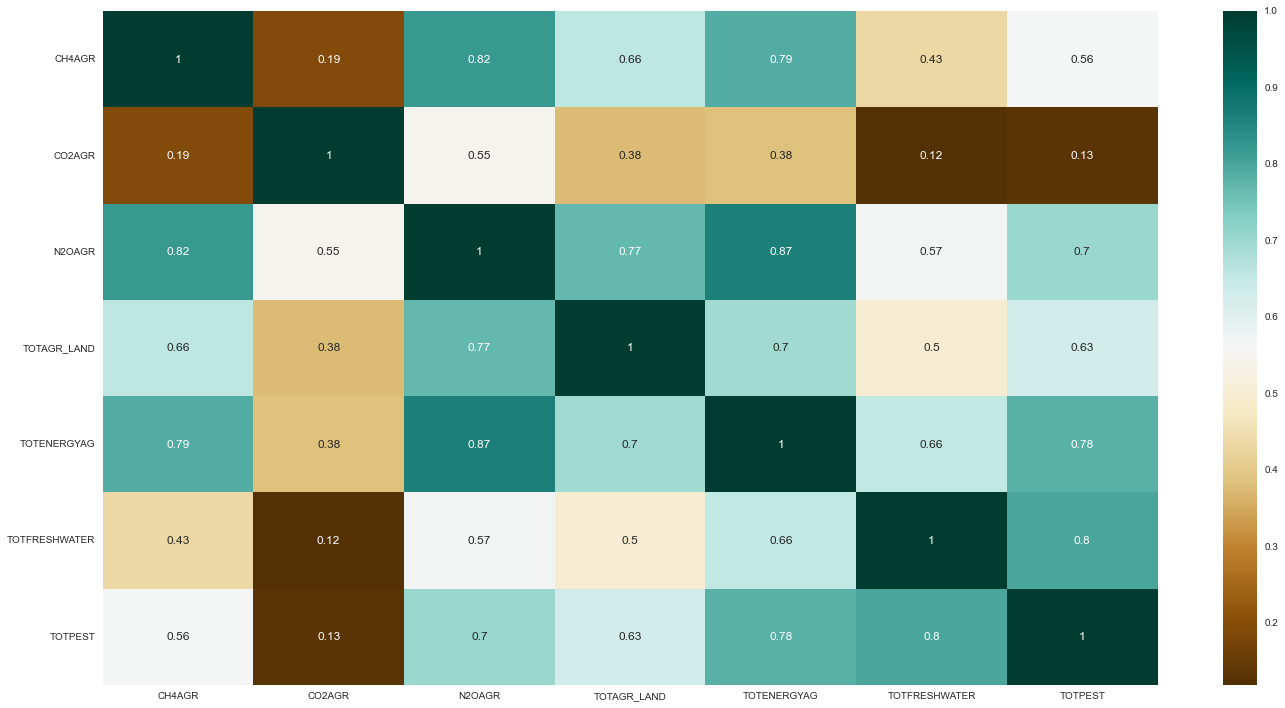

In [2270]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="BrBG")
plt.tight_layout();

### Pairplot

In [2271]:
#sns.pairplot(df, hue="COUNTRY");

### Barplot

In [2272]:
# fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(10,100))
# a = range(7)

# for i in a:
#     sns.barplot(x=df[df.columns[i+2]], y=df.COUNTRY, data=df, ax = ax[i])
#     for p in ax[i].patches:
#         ax[i].annotate(round((p.get_height())), (p.get_x()+0.22, p.get_height()+1.0))
# plt.tight_layout();

## K Means Clustering

In [2273]:
df.head(1)

,COUNTRY,TIME_PERIOD,CH4AGR,CO2AGR,N2OAGR,TOTAGR_LAND,TOTENERGYAG,TOTFRESHWATER,TOTPEST
0,AUS,1985,0.0,0.0,0.0,485605.123,0.0,0.0,0.0


### Train Test Split

In [2274]:
x = df.drop(["COUNTRY", "TIME_PERIOD"], axis=1)
x.head(1)

,CH4AGR,CO2AGR,N2OAGR,TOTAGR_LAND,TOTENERGYAG,TOTFRESHWATER,TOTPEST
0,0.0,0.0,0.0,485605.123,0.0,0.0,0.0


### Scaling

In [2275]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_min = scaler.fit_transform(x)
x_min = pd.DataFrame(data=x_min, columns=df.columns[2:])
x_min

,CH4AGR,CO2AGR,N2OAGR,TOTAGR_LAND,TOTENERGYAG,TOTFRESHWATER,TOTPEST
0,0.000000,0.0,0.000000,0.917901,0.000000,0.0,0.000000
1,0.000000,0.0,0.000000,0.917075,0.000000,0.0,0.000000
2,0.000000,0.0,0.000000,0.890331,0.000000,0.0,0.000000
3,0.000000,0.0,0.000000,0.892248,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000,0.870453,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...
1699,0.033020,0.0,0.033874,0.182106,0.048223,0.0,0.014792
1700,0.031835,0.0,0.032072,0.182106,0.043333,0.0,0.014792
1701,0.031900,0.0,0.035868,0.182106,0.051856,0.0,0.014792
1702,0.031313,0.0,0.034971,0.182106,0.052041,0.0,0.014792


In [2276]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_std = scaler.fit_transform(x)
x_std = pd.DataFrame(data=x_std, columns=df.columns[2:])
x_std

,CH4AGR,CO2AGR,N2OAGR,TOTAGR_LAND,TOTENERGYAG,TOTFRESHWATER,TOTPEST
0,-0.437801,-0.406897,-0.426539,3.638285,-0.457238,-0.229238,-0.232226
1,-0.437801,-0.406897,-0.426539,3.634572,-0.457238,-0.229238,-0.232226
2,-0.437801,-0.406897,-0.426539,3.514413,-0.457238,-0.229238,-0.232226
3,-0.437801,-0.406897,-0.426539,3.523026,-0.457238,-0.229238,-0.232226
4,-0.437801,-0.406897,-0.426539,3.425105,-0.457238,-0.229238,-0.232226
...,...,...,...,...,...,...,...
1699,-0.253018,-0.406897,-0.228983,0.332408,-0.091942,-0.229238,-0.094398
1700,-0.259651,-0.406897,-0.239492,0.332408,-0.128981,-0.229238,-0.094398
1701,-0.259288,-0.406897,-0.217354,0.332408,-0.064419,-0.229238,-0.094398
1702,-0.262571,-0.406897,-0.222589,0.332408,-0.063013,-0.229238,-0.094398


### Hopkins

In [2277]:
from pyclustertend import hopkins

In [2278]:
x.tail(1)

,CH4AGR,CO2AGR,N2OAGR,TOTAGR_LAND,TOTENERGYAG,TOTFRESHWATER,TOTPEST
1703,17022.314,0.0,12168.801,96341.0,2386.718,0.0,0.0


In [2279]:
x_min.tail(1)

,CH4AGR,CO2AGR,N2OAGR,TOTAGR_LAND,TOTENERGYAG,TOTFRESHWATER,TOTPEST
1703,0.030384,0.0,0.03314,0.182106,0.054347,0.0,0.0


In [2280]:
x_std.tail(1)

,CH4AGR,CO2AGR,N2OAGR,TOTAGR_LAND,TOTENERGYAG,TOTFRESHWATER,TOTPEST
1703,-0.267772,-0.406897,-0.233265,0.332408,-0.045544,-0.229238,-0.232226


In [2281]:
print(f"No Scale \t: {hopkins(x, x.shape[0])}")
print(f"MinMax Scale \t: {hopkins(x_min, x_min.shape[0])}")
print(f"StdScl Scale \t: {hopkins(x_std, x_std.shape[0])}")

# Suitable for Clustering >>> close to zero >>> Do Not Use Scaling

No Scale 	: 0.008415752048264221
MinMax Scale 	: 0.011355172030180698
StdScl Scale 	: 0.012106148452316758


### Model

In [2282]:
from sklearn.cluster import KMeans
model = KMeans(random_state=42)

In [2283]:
model.fit_predict(x)

array([7, 7, 7, ..., 0, 0, 0])

In [2284]:
model.fit(x)

KMeans(random_state=42)

In [2285]:
model.labels_

array([7, 7, 7, ..., 0, 0, 0])

In [2286]:
x["Class"] = model.labels_

In [2287]:
x

,CH4AGR,CO2AGR,N2OAGR,TOTAGR_LAND,TOTENERGYAG,TOTFRESHWATER,TOTPEST,Class
0,0.000,0.0,0.000,485605.123,0.000,0.0,0.0,7
1,0.000,0.0,0.000,485167.951,0.000,0.0,0.0,7
2,0.000,0.0,0.000,471019.353,0.000,0.0,0.0,7
3,0.000,0.0,0.000,472033.507,0.000,0.0,0.0,7
4,0.000,0.0,0.000,460503.367,0.000,0.0,0.0,7
...,...,...,...,...,...,...,...,...
1699,18499.379,0.0,12438.388,96341.000,2117.738,0.0,26857.0,0
1700,17835.285,0.0,11776.712,96341.000,1903.008,0.0,26857.0,0
1701,17871.609,0.0,13170.590,96341.000,2277.294,0.0,26857.0,0
1702,17542.932,0.0,12840.974,96341.000,2285.447,0.0,26857.0,0


In [2288]:
x.sort_values(by="Class").Class.unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

### Elbow >>> Best "k"

In [2289]:
ssd = []  # Sum Squared Distances
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(x)
    ssd.append(model.inertia_)

Text(0.5, 1.0, "Elbow For Best 'k'")

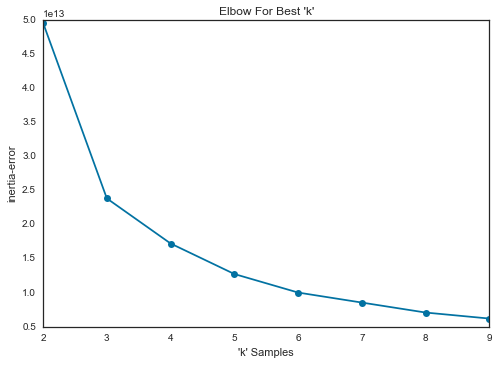

In [2290]:
plt.plot(K, ssd, "bo-")
plt.xlabel("'k' Samples" )
plt.ylabel("inertia-error") 
plt.title("Elbow For Best 'k'") 

In [2291]:
# Due to Elbow >>> Best "k" = 3

### Yellowbrick >>> Best "k"

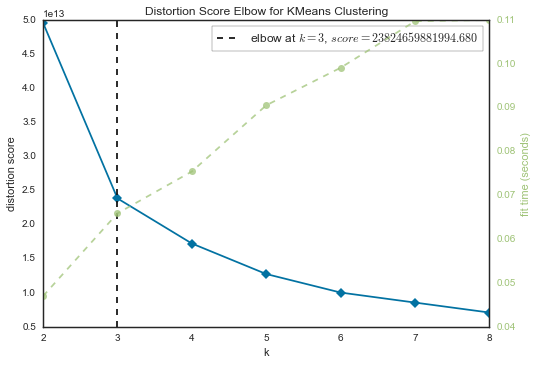

In [2292]:
from yellowbrick.cluster import KElbowVisualizer
model_ = KMeans(random_state=42)

visualizer = KElbowVisualizer(model_, k=(2,9))
visualizer.fit(x)     
visualizer.show();

In [2293]:
# Due to Yellowbrick >>> Best "k" = 3

### Silhouette

In [2294]:
from sklearn.metrics import silhouette_score
silhouette_score(x, model.labels_)
# For k=8 clusters

0.7399168355741476

In [2295]:
range_n_clusters = range(2,9)

for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(x)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.9076895584932368
For n_clusters=3, the silhouette score is 0.8210783096036453
For n_clusters=4, the silhouette score is 0.7774058125384525
For n_clusters=5, the silhouette score is 0.7876487782714071
For n_clusters=6, the silhouette score is 0.7904630598956134
For n_clusters=7, the silhouette score is 0.7328160689171759
For n_clusters=8, the silhouette score is 0.7360104133444572


In [2296]:
# Best Silhouette Score >>> For "k"=3 >>> 0.8210783096036453     

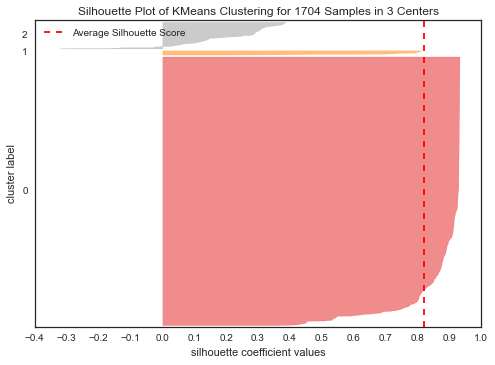

In [2297]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)

visualizer = SilhouetteVisualizer(model3)
visualizer.fit(x)    # Fit the data to the visualizer
visualizer.poof();

### Model With "k"=3

In [2298]:
model = KMeans(n_clusters =3, random_state=42)
model.fit_predict(x)

array([2, 2, 2, ..., 0, 0, 0])

In [2299]:
model.labels_

array([2, 2, 2, ..., 0, 0, 0])

In [2300]:
clusters = model.labels_

In [2301]:
df["pred_class"] = clusters

In [2302]:
df

,COUNTRY,TIME_PERIOD,CH4AGR,CO2AGR,N2OAGR,TOTAGR_LAND,TOTENERGYAG,TOTFRESHWATER,TOTPEST,pred_class
0,AUS,1985,0.000,0.0,0.000,485605.123,0.000,0.0,0.0,2
1,AUS,1986,0.000,0.0,0.000,485167.951,0.000,0.0,0.0,2
2,AUS,1987,0.000,0.0,0.000,471019.353,0.000,0.0,0.0,2
3,AUS,1988,0.000,0.0,0.000,472033.507,0.000,0.0,0.0,2
4,AUS,1989,0.000,0.0,0.000,460503.367,0.000,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
1699,ZAF,2015,18499.379,0.0,12438.388,96341.000,2117.738,0.0,26857.0,0
1700,ZAF,2016,17835.285,0.0,11776.712,96341.000,1903.008,0.0,26857.0,0
1701,ZAF,2017,17871.609,0.0,13170.590,96341.000,2277.294,0.0,26857.0,0
1702,ZAF,2018,17542.932,0.0,12840.974,96341.000,2285.447,0.0,26857.0,0


In [2303]:
df[df["pred_class"]==0].COUNTRY.unique()

array(['AUT', 'BEL', 'BGR', 'CAN', 'CHE', 'CHL', 'COL', 'CRI', 'CYP',
       'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC',
       'HRV', 'HUN', 'IDN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KAZ',
       'KOR', 'LTU', 'LUX', 'LVA', 'MEX', 'MLT', 'NLD', 'NOR', 'NZL',
       'PHL', 'POL', 'PRT', 'ROU', 'RUS', 'SVK', 'SVN', 'SWE', 'TUR',
       'UKR', 'VNM', 'ZAF'], dtype=object)

In [2304]:
df[df["pred_class"]==1].COUNTRY.unique()

array(['CHN'], dtype=object)

In [2305]:
df[df["pred_class"]==2].COUNTRY.unique()

array(['AUS', 'BRA', 'CHN', 'IND', 'RUS', 'USA'], dtype=object)

In [2306]:
# 0 =    'AUT', 'BEL', 'BGR', 'CAN', 'CHE', 'CHL', 'COL', 'CRI', 'CYP',
#        'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC',
#        'HRV', 'HUN', 'IDN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KAZ',
#        'KOR', 'LTU', 'LUX', 'LVA', 'MEX', 'MLT', 'NLD', 'NOR', 'NZL',
#        'PHL', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE', 'TUR', 'UKR',
#        'VNM', 'ZAF'

# 1 =    'CHN'

# 2 =    'AUS', 'BRA', 'IND', 'RUS', 'USA'

### Adjusted Rand Score

In [2307]:
# If data had been classified earlier, we could have evaluated Adjusted Rand Score.

### Visualization Clusters

In [2308]:
df.head(1)

,COUNTRY,TIME_PERIOD,CH4AGR,CO2AGR,N2OAGR,TOTAGR_LAND,TOTENERGYAG,TOTFRESHWATER,TOTPEST,pred_class
0,AUS,1985,0.0,0.0,0.0,485605.123,0.0,0.0,0.0,2


In [2309]:
# CH4AGR        : Total Methane (CH4) from agriculture
# CO2AGR        : Total Carbone dioxide (CO2) from agriculture
# N2OAGR        : Total Nitrous oxide (N2O) from agriculture
# TOTAGR_LAND   : Total Agricultural Land area
# TOTENERGYAG   : Direct on-farm energy consumption
# TOTFRESHWATER : Total freshwater abstraction
# TOTPEST       : Total sales of agricultural pesticides

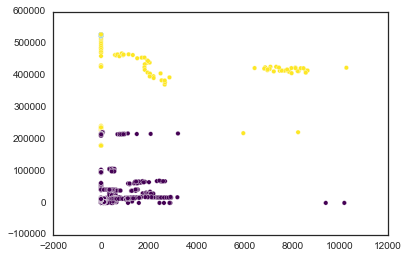

In [2310]:
plt.figure(figsize=(6,4))
plt.scatter(df["CO2AGR"], df["TOTAGR_LAND"], c = df.pred_class, cmap = "viridis")
plt.tight_layout;

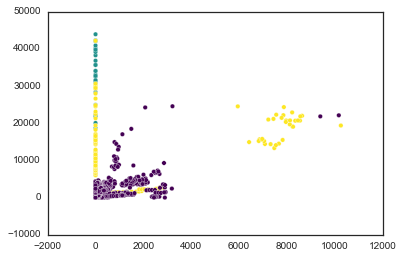

In [2311]:
plt.figure(figsize=(6,4))
plt.scatter(df["CO2AGR"], df["TOTENERGYAG"], c = df.pred_class, cmap = "viridis")
plt.tight_layout;

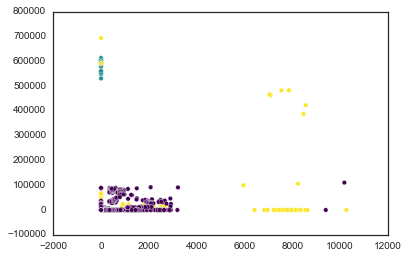

In [2312]:
plt.figure(figsize=(6,4))
plt.scatter(df["CO2AGR"], df["TOTFRESHWATER"], c = df.pred_class, cmap = "viridis")
plt.tight_layout;

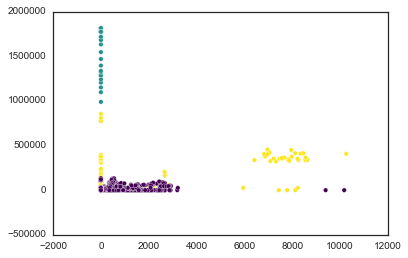

In [2313]:
plt.figure(figsize=(6,4))
plt.scatter(df["CO2AGR"], df["TOTPEST"], c = df.pred_class, cmap = "viridis")
plt.tight_layout;

In [2314]:
df.head(1)

,COUNTRY,TIME_PERIOD,CH4AGR,CO2AGR,N2OAGR,TOTAGR_LAND,TOTENERGYAG,TOTFRESHWATER,TOTPEST,pred_class
0,AUS,1985,0.0,0.0,0.0,485605.123,0.0,0.0,0.0,2


In [2315]:
df1 = df.set_index("COUNTRY")
df1

,TIME_PERIOD,CH4AGR,CO2AGR,N2OAGR,TOTAGR_LAND,TOTENERGYAG,TOTFRESHWATER,TOTPEST,pred_class
COUNTRY,,,,,,,,,
AUS,1985,0.000,0.0,0.000,485605.123,0.000,0.0,0.0,2
AUS,1986,0.000,0.0,0.000,485167.951,0.000,0.0,0.0,2
AUS,1987,0.000,0.0,0.000,471019.353,0.000,0.0,0.0,2
AUS,1988,0.000,0.0,0.000,472033.507,0.000,0.0,0.0,2
AUS,1989,0.000,0.0,0.000,460503.367,0.000,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...
ZAF,2015,18499.379,0.0,12438.388,96341.000,2117.738,0.0,26857.0,0
ZAF,2016,17835.285,0.0,11776.712,96341.000,1903.008,0.0,26857.0,0
ZAF,2017,17871.609,0.0,13170.590,96341.000,2277.294,0.0,26857.0,0


In [2316]:
x = df1.drop(["TIME_PERIOD", "pred_class"], axis=1)
x.head(1)

,CH4AGR,CO2AGR,N2OAGR,TOTAGR_LAND,TOTENERGYAG,TOTFRESHWATER,TOTPEST
COUNTRY,,,,,,,
AUS,0.0,0.0,0.0,485605.123,0.0,0.0,0.0


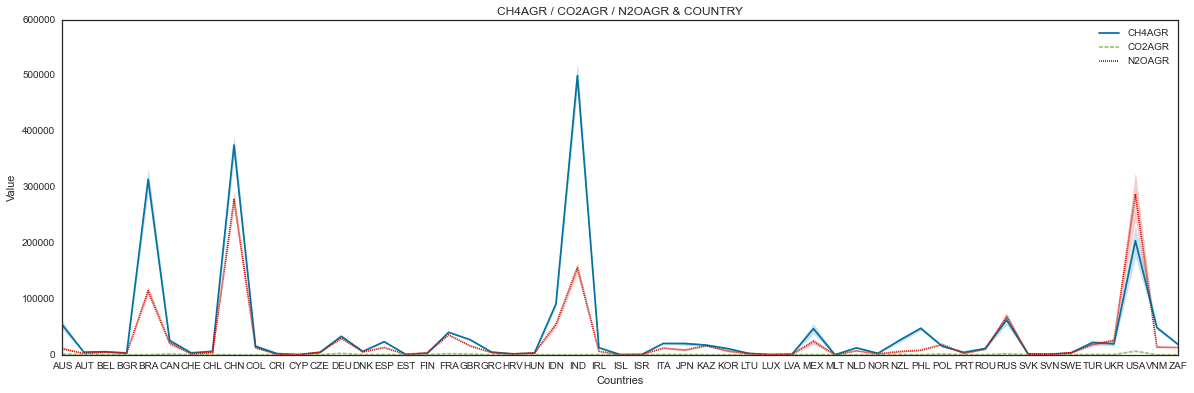

In [2317]:
plt.figure(figsize=(20,6))
sns.lineplot(data=x[["CH4AGR","CO2AGR","N2OAGR"]])
plt.title("CH4AGR / CO2AGR / N2OAGR & COUNTRY")
plt.xlabel("Countries")
plt.ylabel("Value")
plt.tight_layout;

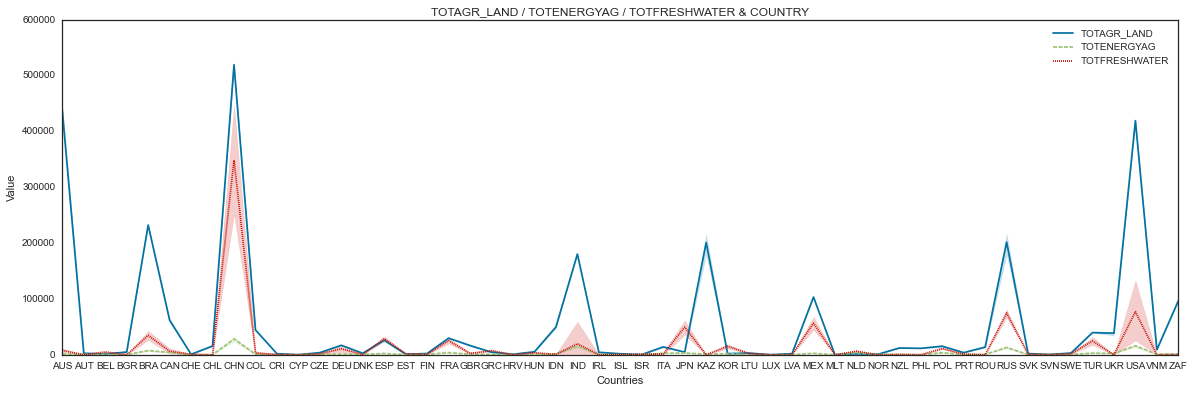

In [2318]:
plt.figure(figsize=(20,6))
sns.lineplot(data=x[["TOTAGR_LAND","TOTENERGYAG","TOTFRESHWATER"]])
plt.title("TOTAGR_LAND / TOTENERGYAG / TOTFRESHWATER & COUNTRY")
plt.xlabel("Countries")
plt.ylabel("Value")
plt.tight_layout;

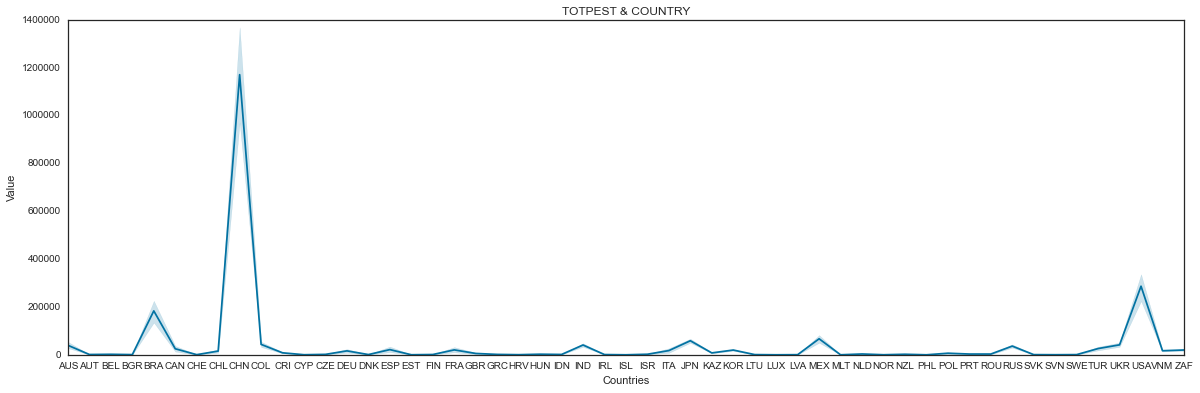

In [2319]:
plt.figure(figsize=(20,6))
sns.lineplot(data=x["TOTPEST"])
plt.title("TOTPEST & COUNTRY")
plt.xlabel("Countries")
plt.ylabel("Value")
plt.tight_layout;

In [2320]:
x["pred_class"] = clusters
x

,CH4AGR,CO2AGR,N2OAGR,TOTAGR_LAND,TOTENERGYAG,TOTFRESHWATER,TOTPEST,pred_class
COUNTRY,,,,,,,,
AUS,0.000,0.0,0.000,485605.123,0.000,0.0,0.0,2
AUS,0.000,0.0,0.000,485167.951,0.000,0.0,0.0,2
AUS,0.000,0.0,0.000,471019.353,0.000,0.0,0.0,2
AUS,0.000,0.0,0.000,472033.507,0.000,0.0,0.0,2
AUS,0.000,0.0,0.000,460503.367,0.000,0.0,0.0,2
...,...,...,...,...,...,...,...,...
ZAF,18499.379,0.0,12438.388,96341.000,2117.738,0.0,26857.0,0
ZAF,17835.285,0.0,11776.712,96341.000,1903.008,0.0,26857.0,0
ZAF,17871.609,0.0,13170.590,96341.000,2277.294,0.0,26857.0,0


In [2321]:
x = x.reset_index(drop=True)
x

,CH4AGR,CO2AGR,N2OAGR,TOTAGR_LAND,TOTENERGYAG,TOTFRESHWATER,TOTPEST,pred_class
0,0.000,0.0,0.000,485605.123,0.000,0.0,0.0,2
1,0.000,0.0,0.000,485167.951,0.000,0.0,0.0,2
2,0.000,0.0,0.000,471019.353,0.000,0.0,0.0,2
3,0.000,0.0,0.000,472033.507,0.000,0.0,0.0,2
4,0.000,0.0,0.000,460503.367,0.000,0.0,0.0,2
...,...,...,...,...,...,...,...,...
1699,18499.379,0.0,12438.388,96341.000,2117.738,0.0,26857.0,0
1700,17835.285,0.0,11776.712,96341.000,1903.008,0.0,26857.0,0
1701,17871.609,0.0,13170.590,96341.000,2277.294,0.0,26857.0,0
1702,17542.932,0.0,12840.974,96341.000,2285.447,0.0,26857.0,0


In [2322]:
pred_class = x.groupby("pred_class").mean().T
pred_class

pred_class,0,1,2
CH4AGR,15571.743773,3.965718e+05,269697.386046
CO2AGR,357.483737,0.000000e+00,1973.457493
N2OAGR,10413.663177,2.945188e+05,148007.378434
TOTAGR_LAND,22536.185462,5.265830e+05,328235.963513
TOTENERGYAG,1347.946068,3.322574e+04,10710.026447
TOTFRESHWATER,7291.571456,4.646274e+05,37443.295428
TOTPEST,10982.859145,1.511390e+06,148374.474888


In [2323]:
# 0 =    'AUT', 'BEL', 'BGR', 'CAN', 'CHE', 'CHL', 'COL', 'CRI', 'CYP',
#        'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC',
#        'HRV', 'HUN', 'IDN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KAZ',
#        'KOR', 'LTU', 'LUX', 'LVA', 'MEX', 'MLT', 'NLD', 'NOR', 'NZL',
#        'PHL', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE', 'TUR', 'UKR',
#        'VNM', 'ZAF'

# 1 =    'CHN'

# 2 =    'AUS', 'BRA', 'IND', 'RUS', 'USA'

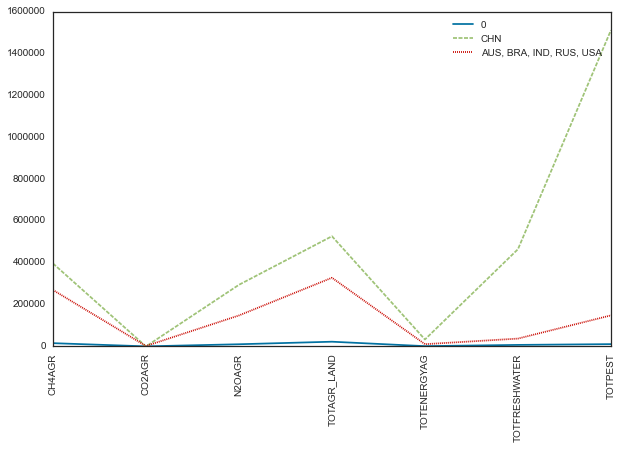

In [2324]:
plt.figure(figsize=(10,6))
sns.lineplot(data=pred_class)
plt.xticks(rotation=90)
plt.legend(labels=["0","CHN","AUS, BRA, IND, RUS, USA"]);

### Prediction

In [2325]:
x.head(1)

,CH4AGR,CO2AGR,N2OAGR,TOTAGR_LAND,TOTENERGYAG,TOTFRESHWATER,TOTPEST,pred_class
0,0.0,0.0,0.0,485605.123,0.0,0.0,0.0,2


In [2326]:
from sklearn.model_selection import train_test_split
x = df.drop(["COUNTRY", "TIME_PERIOD", "pred_class"], axis=1)
x.head(1)

,CH4AGR,CO2AGR,N2OAGR,TOTAGR_LAND,TOTENERGYAG,TOTFRESHWATER,TOTPEST
0,0.0,0.0,0.0,485605.123,0.0,0.0,0.0


In [2327]:
final_model = KMeans(n_clusters =3, random_state=42)
final_model.fit_predict(x)

array([2, 2, 2, ..., 0, 0, 0])

In [2328]:
pred_data = [[43830, 496, 26855, 57200, 2650, 16690, 45251]]
# Means of all features

In [2329]:
final_model.predict(pred_data)

array([0])